In [1]:
# Import packages from Python standard library
import numpy as np
import pandas as pd
import re
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
#Data including zeros
branches = pd.read_csv('../can-summer-2023/data/clean/branch_metrics.csv')
    #Fill NaN with 0
branches['COMPUTER_SESSIONS'] = branches['COMPUTER_SESSIONS'].fillna(0)
branches['VISITORS'] = branches['VISITORS'].fillna(0)

In [3]:
branches.head()

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0


In [4]:
#Data not including zeros
branches_nonzero = branches[(branches['VISITORS'] > 0) & (branches['COMPUTER_SESSIONS'] > 0)]
    #Locating a list of branches where the computer sessions > visitors
#branches_sessions = branches_nonzero.loc[(branches_nonzero['COMPUTER_SESSIONS']) >= branches_nonzero['VISITORS']]
#branches_sessions

In [5]:
branches_nonzero.head()

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0


## Comparsion of %'s of Computer Sessions / Visitors: INCLUDING ZEROS

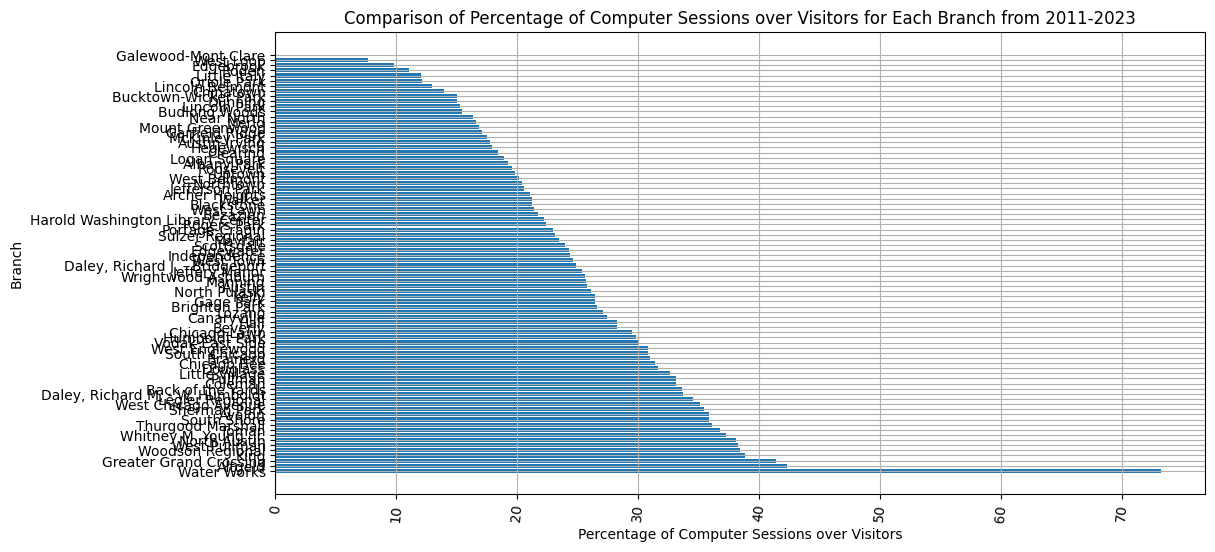

In [6]:
# Calculate the sum of Computer Sessions and sum of Visitors from all years
branch_metrics = branches.groupby('BRANCH').agg({'COMPUTER_SESSIONS': 'sum', 'VISITORS': 'sum'})

# Adding a column that calculates the Computer Session Percentage (computer sessions/visitors)*100
branch_metrics['COMPUTER_SESSION_PERCENTAGE'] = (branch_metrics['COMPUTER_SESSIONS'] / branch_metrics['VISITORS']) * 100

# Sort percentages of Computer Sessions from greatest to least
branch_metrics_sorted = branch_metrics.sort_values('COMPUTER_SESSION_PERCENTAGE', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(branch_metrics_sorted.index, branch_metrics_sorted['COMPUTER_SESSION_PERCENTAGE'])
plt.xlabel('Percentage of Computer Sessions over Visitors')
plt.ylabel('Branch')
plt.title('Comparison of Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

Explanation For Above Graph:
- This graph sums up all of the Computer Sessions and sums up the Visitors from each branch for all years.
- Then, it creates a new column that displays the values when dividing (sum of Computer Sessions/sum of Visitors)*100 and sorts them from greatest to least

## Comparsion of %'s of Computer Sessions / Visitors: NONZERO

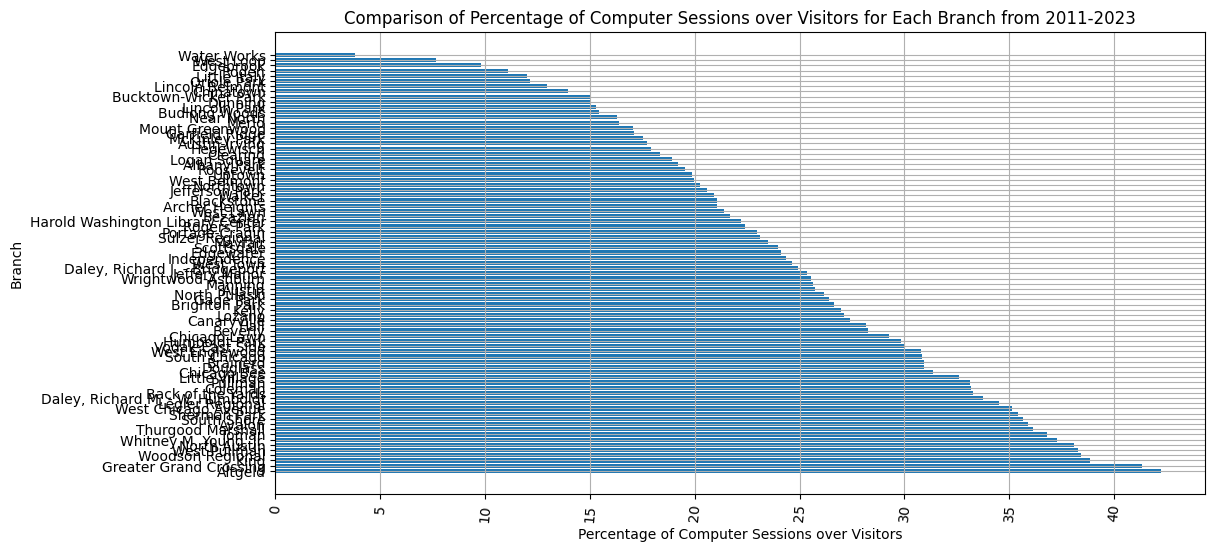

In [7]:
# Calculate the sum of Computer Sessions and sum of Visitors from all years
branch_metrics2 = branches_nonzero.groupby('BRANCH').agg({'COMPUTER_SESSIONS': 'sum', 'VISITORS': 'sum'})

# Adding a column that calculates the Computer Session Percentage (computer sessions/visitors)*100
branch_metrics2['COMPUTER_SESSION_PERCENTAGE'] = (branch_metrics2['COMPUTER_SESSIONS'] / branch_metrics2['VISITORS']) * 100

# Sort percentages of Computer Sessions from greatest to least
branch_metrics_sorted = branch_metrics2.sort_values('COMPUTER_SESSION_PERCENTAGE', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(branch_metrics_sorted.index, branch_metrics_sorted['COMPUTER_SESSION_PERCENTAGE'])
plt.xlabel('Percentage of Computer Sessions over Visitors')
plt.ylabel('Branch')
plt.title('Comparison of Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

### What I Noticed:

- In the Zero's graph, Water Works is significantly higher
- In the Nonzeros, Altgeld is the highest, but still much less than Water Works

## Adding in Computer Session Percentage Column: 

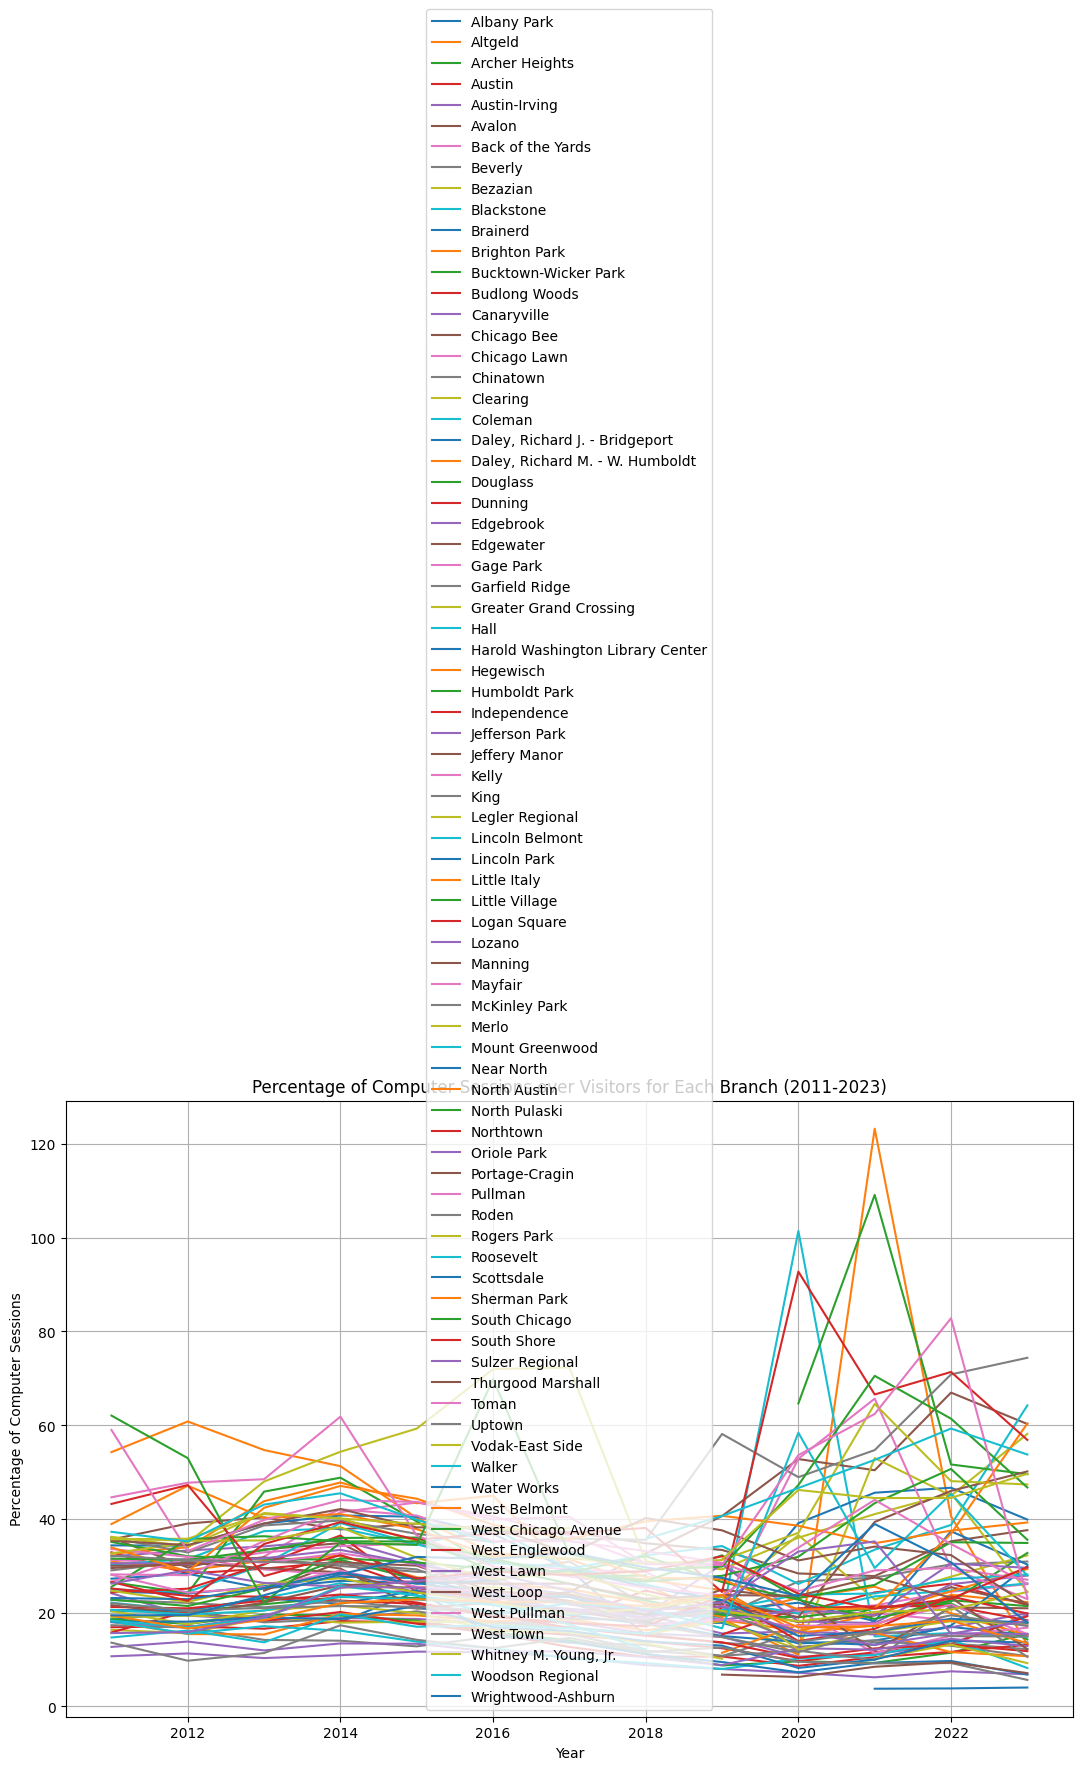

In [11]:
# New Dataframe with all branches that includes the "Computer Session Percentage" column
branches_cp = branches_nonzero.copy()
branches_cp['COMPUTER_SESSIONS_PERCENTAGE'] = (branches['COMPUTER_SESSIONS'] / branches['VISITORS']) * 100
#branches_cp_sorted = branches_cp.sort_values('COMPUTER_SESSIONS_PERCENTAGE', ascending=False)
#branches_cp_sorted

branches_groupby = branches_cp.groupby(['BRANCH', 'YEAR'])['COMPUTER_SESSIONS_PERCENTAGE'].mean().unstack()
plt.figure(figsize=(13, 8))
for branch in branches_groupby.index:
    plt.plot(branches_groupby.columns, branches_groupby.loc[branch], label=branch)
plt.xlabel('Year')
plt.ylabel('Percentage of Computer Sessions')
plt.title('Percentage of Computer Sessions over Visitors for Each Branch (2011-2023)')
plt.legend()
plt.grid(True)
plt.show()

## Comparing the Average % of all Computer Sessions over Visitors for All Branches vs One Specified Branch

### Looking at Altgeld:

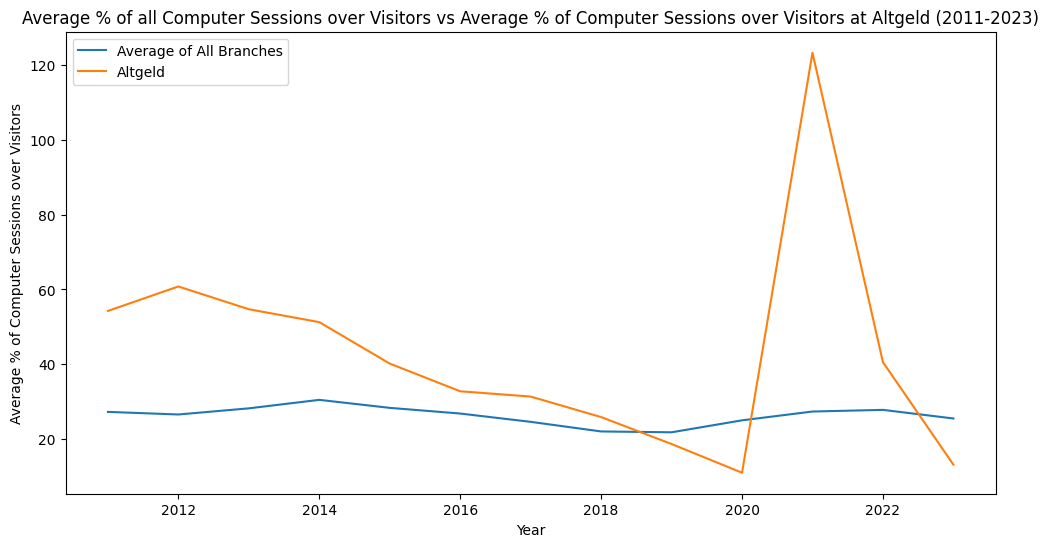

In [9]:
#Selected branch
branch_name = 'Altgeld'

#Average of each column using DataFrame.mean()
avg_col_branches = branches_groupby.mean(axis=0)
avg_col_branches

#Extracting specific branch
selected_branch = branches_groupby.loc[branch_name]

plt.figure(figsize=(12,6))
plt.plot(avg_col_branches, label='Average of All Branches')
plt.plot(selected_branch, label=branch_name)
plt.xlabel('Year')
plt.ylabel('Average % of Computer Sessions over Visitors')
plt.title(f'Average % of all Computer Sessions over Visitors vs Average % of Computer Sessions over Visitors at {branch_name} (2011-2023)')
plt.legend()
plt.show()

### Looking at Douglass

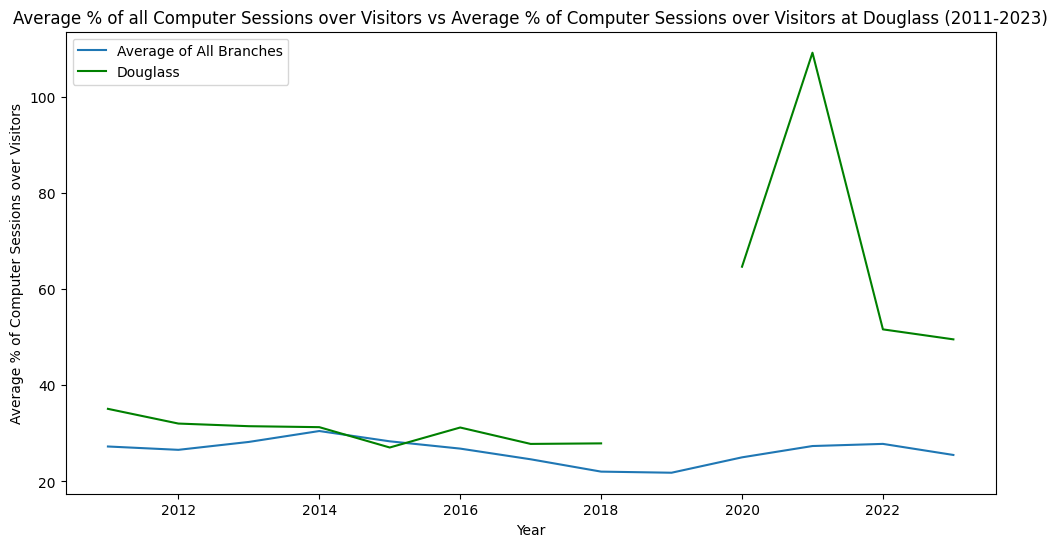

In [10]:
#Selected branch
branch_name = 'Douglass'

#Average of each column using DataFrame.mean()
avg_col_branches = branches_groupby.mean(axis=0)
avg_col_branches

#Extracting specific branch
selected_branch = branches_groupby.loc[branch_name]

plt.figure(figsize=(12,6))
plt.plot(avg_col_branches, label='Average of All Branches')
plt.plot(selected_branch, label=branch_name, color='green')
plt.xlabel('Year')
plt.ylabel('Average % of Computer Sessions over Visitors')
plt.title(f'Average % of all Computer Sessions over Visitors vs Average % of Computer Sessions over Visitors at {branch_name} (2011-2023)')
plt.legend()
plt.show()

Things to Do:
- look at library branches that correpond to the outlier branches with cut offs
- look behind the scenes at dataframes: select by location and look at visitors, 
- check visitors counts to see if they were low (are there zeros, infnity values, Nan)

Note:
When graphing things with respect to time: dont drop zeros (USE WHOLE DATASET)
- except when we are interested in percentages or ratios

Water Works
Edgewater
Glenwood Monclair